In [1]:
## 필요한 라이브러리를 불러옵니다. 
import time
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import redis
from fastapi import FastAPI, File, UploadFile
## pyspark를 불러옵니다.
from pyspark import SparkContext

In [2]:
sc = SparkContext(master="local", appName="first app")

In [3]:
!pwd

/home


In [4]:
from PIL import Image


path = './초기구상.png'

image_pil = Image.open(path)
image = np.array(image_pil)

In [7]:
np.min(image), np.max(image)


(0, 255)

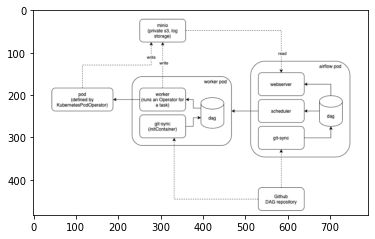

In [10]:
vector = plt.imshow(image)

In [11]:
import io
from starlette.responses import StreamingResponse

app = FastAPI()

@app.post("/vector_image")
def image_endpoint(*, vector):
    # Returns a cv2 image array from the document vector
    cv2img = my_function(vector)
    res, im_png = cv2.imencode(".png", cv2img)
    return StreamingResponse(io.BytesIO(im_png.tobytes()), media_type="image/png")

In [12]:
app.run()

AttributeError: 'FastAPI' object has no attribute 'run'

In [ ]:
@app.post("/files/")
async def create_file(file: bytes = File(...)):
    return {"file_size": len(file)}


@app.post("/uploadfile/")
async def create_upload_file(file: UploadFile = File(...)):
    return {"filename": file.filename}

In [ ]:
#app = Flask


@app.route('/')
def fig():
    if sc is None: app = FastAPI()
        sc = SparkContext(master="local", appName="first app")
    else:
        sc.stop()
        sc = SparkContext(master="local", appName="first app")

## 이미 spark context가 살아 있으면 죽이고, 있으면 그대로 사용합니다. 
## spark context는 한 번에 여러 개 돌리려면 세팅에 몇 개를 추가해야 한다.
## 또한 스파크 컨텍스트를 제대로 구현하려면 여기에 넘겨야 하는 값들이 많이 있다. 하지만 간소하게 구현 
    if sc is None: 
        sc = SparkContext(master="local", appName="first app")
    else:
        sc.stop()
        sc = SparkContext(master="local", appName="first app")

    ### peformance check 
    spark_time_lst = []
    python_time_lst = []
    python_np_time_lst = []
    
    n_lst = [20000*i for i in range(0, 10)]
    
    
    for n in n_lst:
        def each_k(k):
            return 1/(16**k)*( 4/(8*k+1) - 2/(8*k+4) - 1/(8*k+5) - 1/(8*k+6))
        ## with spark 
        start_time = time.time()
        pi_approximated = sc.parallelize(range(0, n)).map(each_k).sum()
        spark_time_lst.append(time.time()-start_time)
        ## pure python
        start_time = time.time()
        pi_approximated = sum((each_k(k) for k in range(0, n)))
        python_time_lst.append(time.time()-start_time)
        ## with numpy 
        start_time = time.time()
        pi_approximated = np.apply_along_axis(arr=np.array(range(0, 10)), func1d=each_k, axis=0).sum()
        python_np_time_lst.append(time.time() - start_time)

    ### plotting     
    df = pd.DataFrame({
        "spark":spark_time_lst.copy(), 
        "pure python":python_time_lst.copy(), 
        "python with numpy":python_np_time_lst.copy()
    }, index = [20000*i for i in range(0, 10)])
    plt.figure(figsize=(12, 6))
    plt.plot(df['spark'], 'ro-'), plt.plot(df['pure python'], 'bo-'), plt.plot(df['python with numpy'], 'go-')
    plt.legend(fontsize=25)
    plt.xticks([20000*i for i in range(0, 10)], [20000*i for i in range(0, 10)])
    img = ByteIO()
    plt.savefig(img, format='png',dpi =200)
    img.seek(0)
    return send_file(img, mimetype='image/png')
   # plt.show()
if __name__ == '__main__':
    app.run(debug=False)